In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg/extrait_wSleepPage01.csv
/kaggle/input/eeg/spindles.csv


# 1 - Input the Data

In [2]:
#This CSV file is separated by the 'delimiter ;'
df1 = pd.read_csv('/kaggle/input/eeg/extrait_wSleepPage01.csv', delimiter = ";")
df2 = pd.read_csv('/kaggle/input/eeg/spindles.csv', delimiter = ";")

In [3]:
df1

,Date,HH,MM,SS,EOG Left,EEG C3-A1,EEG O1-A1,EEG C4-A1,EEG O2-A1
0,08/03/2016,1,27,22,"0,78125","5,56640625","-12,40234375","0,9765625","13,76953125"
1,08/03/2016,1,27,"22,005","1,953125","4,78515625","-11,23046875","-0,09765625","17,08984375"
2,08/03/2016,1,27,"22,01","-1,67E-14","4,296875","-11,23046875","0,9765625","17,96875"
3,08/03/2016,1,27,"22,015","0,78125","4,78515625","-12,01171875","6,34765625","20,1171875"
4,08/03/2016,1,27,"22,02","0,29296875","4,1015625","-13,18359375","8,10546875","17,3828125"
...,...,...,...,...,...,...,...,...,...
248435,08/03/2016,1,48,"4,175","-22,4609375","-21,38671875","21,77734375","-21,484375","21,6796875"
248436,08/03/2016,1,48,"4,18","-20,703125","-21,97265625","18,26171875","-19,43359375","19,921875"
248437,08/03/2016,1,48,"4,185","-20,5078125","-21,09375","14,6484375","-17,7734375","18,9453125"
248438,08/03/2016,1,48,"4,19","-18,06640625","-14,94140625","12,109375","-9,765625","17,48046875"


In [4]:
df2

,Date,HH,MM,SS,EOG Left[uV],EEG C3-A1[uV],EEG O1-A1[uV],EEG C4-A1[uV],EEG O2-A1[uV]
0,2016/03/08,1,27,"21,5","-7,12890625000002","2,05078124999998","23,6328125","3,02734374999998","18,45703125"
1,2016/03/08,1,27,"21,505","-6,64062500000002","-2,05078125000002","19,43359375","2,83203124999998","19,7265625"
2,2016/03/08,1,27,"21,51","-6,34765625000002","-1,85546875000002","17,28515625","4,10156249999998","19,3359375"
3,2016/03/08,1,27,"21,515","-7,32421875000002","-1,66015625000002","16,89453125","5,56640624999998","19,23828125"
4,2016/03/08,1,27,"21,52","-5,66406250000002","-0,488281250000017","16,796875","7,42187499999998","20,99609375"
...,...,...,...,...,...,...,...,...,...
2593,2016/03/08,1,48,"3,845","29,296875","-35,83984375","-1,75781250000002","-30,2734375","6,24999999999998"
2594,2016/03/08,1,48,"3,85","28,41796875","-27,734375","3,51562499999998","-23,2421875","14,0625"
2595,2016/03/08,1,48,"3,855","27,44140625","-20,8984375","9,27734374999998","-17,3828125","16,89453125"
2596,2016/03/08,1,48,"3,86","27,05078125","-16,9921875","9,76562499999998","-11,42578125","16,9921875"


The idea is clear that this data is recorded in time. The features are the intensity of EEG in real time. So we can plot them as function of time. 

In [5]:
print ('Start time of this record is', df1['Date'][0], df1['HH'][0],":",df1['MM'][0],":",df1['SS'][0])
print ('End time of this record is', df1['Date'].iloc[-1], df1['HH'].iloc[-1],":",df1['MM'].iloc[-1],":",df1['SS'].iloc[-1])
print ('Duration of measurement is about',df1['MM'].iloc[-1]-df1['MM'][0],'minutes')

Start time of this record is 08/03/2016 1 : 27 : 22
End time of this record is 08/03/2016 1 : 48 : 4,195
Duration of measurement is about 21 minutes


The first data is recorded at the same day 2016-03-08. The duration is about 21 minutes. We can create a new colume to represent the time.

In [6]:
#create a new column to match the time feature
df1['Time (s)'] = np.arange(0,248440*0.005,0.005)

In [7]:
# The useful features of df1 contain "EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"
df1_new = df1[['Time (s)',"EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"]]
df1_new

,Time (s),EOG Left,EEG C3-A1,EEG O1-A1,EEG C4-A1,EEG O2-A1
0,0.000,"0,78125","5,56640625","-12,40234375","0,9765625","13,76953125"
1,0.005,"1,953125","4,78515625","-11,23046875","-0,09765625","17,08984375"
2,0.010,"-1,67E-14","4,296875","-11,23046875","0,9765625","17,96875"
3,0.015,"0,78125","4,78515625","-12,01171875","6,34765625","20,1171875"
4,0.020,"0,29296875","4,1015625","-13,18359375","8,10546875","17,3828125"
...,...,...,...,...,...,...
248435,1242.175,"-22,4609375","-21,38671875","21,77734375","-21,484375","21,6796875"
248436,1242.180,"-20,703125","-21,97265625","18,26171875","-19,43359375","19,921875"
248437,1242.185,"-20,5078125","-21,09375","14,6484375","-17,7734375","18,9453125"
248438,1242.190,"-18,06640625","-14,94140625","12,109375","-9,765625","17,48046875"


We notice that the features "EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1" are string not float. So we need to convert them as float. The problem is to replace the comma "," to dot ".". 

In [8]:
features = ["EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"]
for x in features:
    df1_new[x] = [x.replace(',', '.') for x in df1_new[x]]

    
df1_new = df1_new.astype('float')

In [9]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248440 entries, 0 to 248439
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time (s)   248440 non-null  float64
 1   EOG Left   248440 non-null  float64
 2   EEG C3-A1  248440 non-null  float64
 3   EEG O1-A1  248440 non-null  float64
 4   EEG C4-A1  248440 non-null  float64
 5   EEG O2-A1  248440 non-null  float64
dtypes: float64(6)
memory usage: 11.4 MB


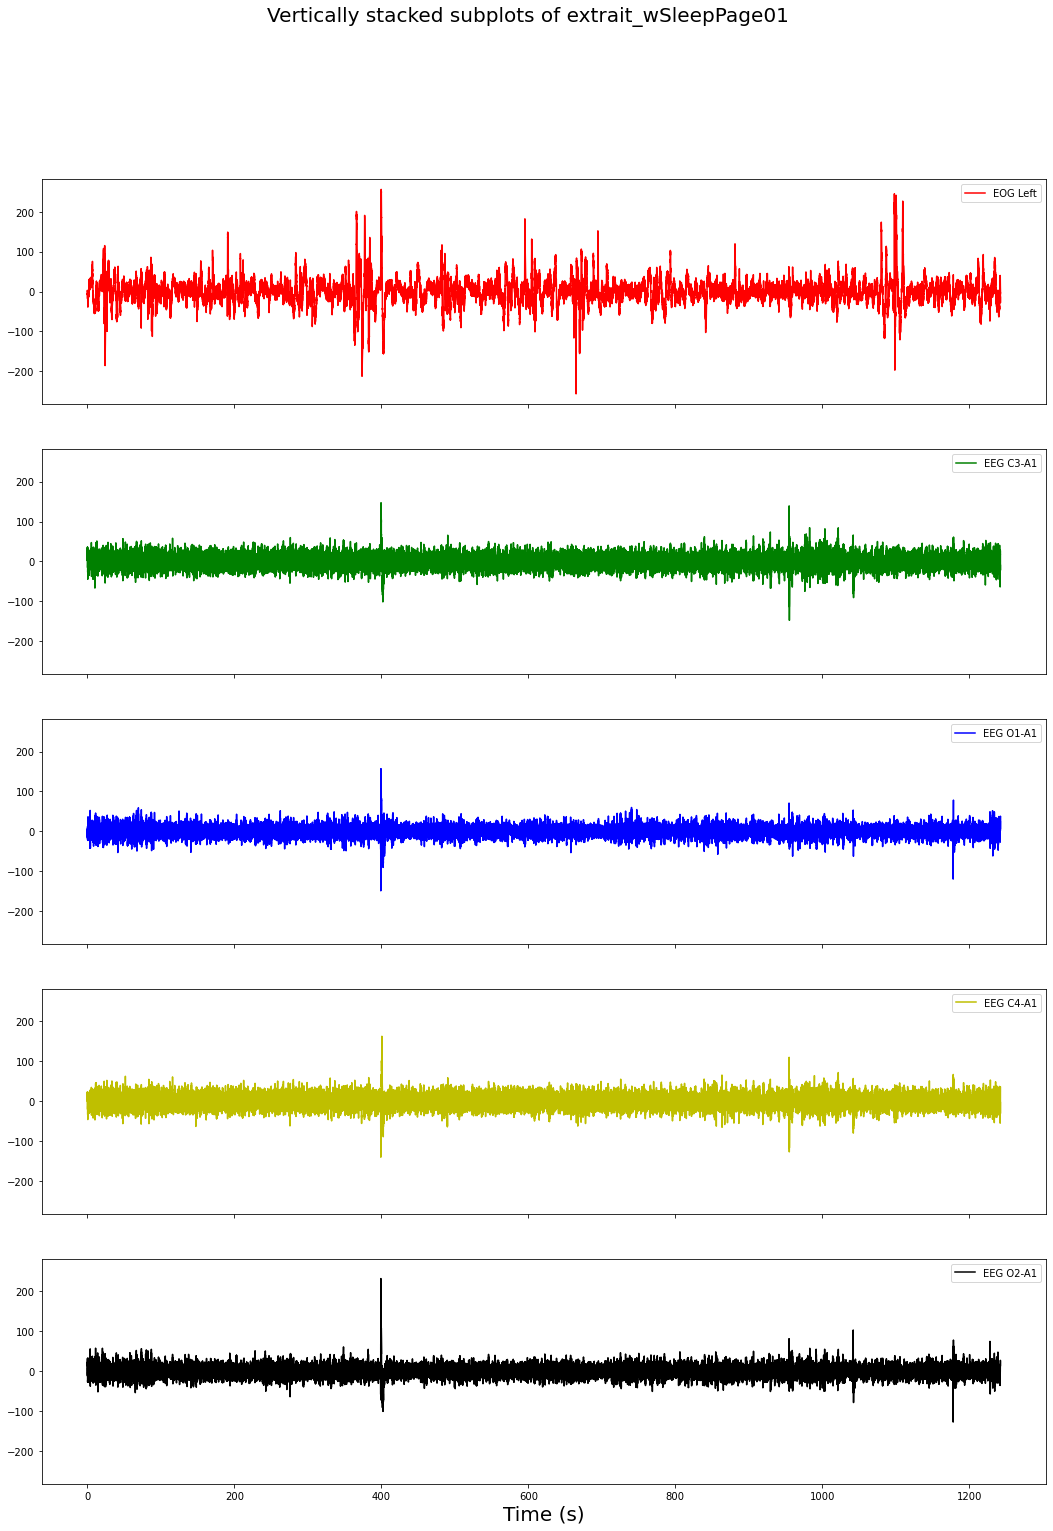

In [10]:
# plot these features in the same graph with stack plot
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["EOG Left", "EEG C3-A1", "EEG O1-A1", 'EEG C4-A1', 'EEG O2-A1']
colors = ["r","g","b",'y',"k"]
fig.suptitle('Vertically stacked subplots of extrait_wSleepPage01', fontsize = 20)
# ---- loop over axes ----
for i,ax in enumerate(axs):
  axs[i].plot(df1_new['Time (s)'], df1_new[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")

plt.xlabel('Time (s)', fontsize = 20)
plt.show()


Then we can deal the dataset df2 of splendles.csv





In [11]:
#create a new column to match the time feature for df2
df2['Time (s)'] = np.arange(0,df2.count()[0]*0.005,0.005)

In [12]:
df2

,Date,HH,MM,SS,EOG Left[uV],EEG C3-A1[uV],EEG O1-A1[uV],EEG C4-A1[uV],EEG O2-A1[uV],Time (s)
0,2016/03/08,1,27,"21,5","-7,12890625000002","2,05078124999998","23,6328125","3,02734374999998","18,45703125",0.000
1,2016/03/08,1,27,"21,505","-6,64062500000002","-2,05078125000002","19,43359375","2,83203124999998","19,7265625",0.005
2,2016/03/08,1,27,"21,51","-6,34765625000002","-1,85546875000002","17,28515625","4,10156249999998","19,3359375",0.010
3,2016/03/08,1,27,"21,515","-7,32421875000002","-1,66015625000002","16,89453125","5,56640624999998","19,23828125",0.015
4,2016/03/08,1,27,"21,52","-5,66406250000002","-0,488281250000017","16,796875","7,42187499999998","20,99609375",0.020
...,...,...,...,...,...,...,...,...,...,...
2593,2016/03/08,1,48,"3,845","29,296875","-35,83984375","-1,75781250000002","-30,2734375","6,24999999999998",12.965
2594,2016/03/08,1,48,"3,85","28,41796875","-27,734375","3,51562499999998","-23,2421875","14,0625",12.970
2595,2016/03/08,1,48,"3,855","27,44140625","-20,8984375","9,27734374999998","-17,3828125","16,89453125",12.975
2596,2016/03/08,1,48,"3,86","27,05078125","-16,9921875","9,76562499999998","-11,42578125","16,9921875",12.980


In [13]:
# The useful features of df1 contain "EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"
df2_new = df2[['Time (s)',"EOG Left[uV]", "EEG C3-A1[uV]", "EEG O1-A1[uV]", "EEG C4-A1[uV]", "EEG O2-A1[uV]"]]
df2_new

,Time (s),EOG Left[uV],EEG C3-A1[uV],EEG O1-A1[uV],EEG C4-A1[uV],EEG O2-A1[uV]
0,0.000,"-7,12890625000002","2,05078124999998","23,6328125","3,02734374999998","18,45703125"
1,0.005,"-6,64062500000002","-2,05078125000002","19,43359375","2,83203124999998","19,7265625"
2,0.010,"-6,34765625000002","-1,85546875000002","17,28515625","4,10156249999998","19,3359375"
3,0.015,"-7,32421875000002","-1,66015625000002","16,89453125","5,56640624999998","19,23828125"
4,0.020,"-5,66406250000002","-0,488281250000017","16,796875","7,42187499999998","20,99609375"
...,...,...,...,...,...,...
2593,12.965,"29,296875","-35,83984375","-1,75781250000002","-30,2734375","6,24999999999998"
2594,12.970,"28,41796875","-27,734375","3,51562499999998","-23,2421875","14,0625"
2595,12.975,"27,44140625","-20,8984375","9,27734374999998","-17,3828125","16,89453125"
2596,12.980,"27,05078125","-16,9921875","9,76562499999998","-11,42578125","16,9921875"


In [14]:
# replace the comma to dot
features = ["EOG Left[uV]", "EEG C3-A1[uV]", "EEG O1-A1[uV]", "EEG C4-A1[uV]", "EEG O2-A1[uV]"]
for x in features:
    df2_new[x] = [x.replace(',', '.') for x in df2_new[x]]

    
df2_new = df2_new.astype('float')

In [15]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time (s)       2598 non-null   float64
 1   EOG Left[uV]   2598 non-null   float64
 2   EEG C3-A1[uV]  2598 non-null   float64
 3   EEG O1-A1[uV]  2598 non-null   float64
 4   EEG C4-A1[uV]  2598 non-null   float64
 5   EEG O2-A1[uV]  2598 non-null   float64
dtypes: float64(6)
memory usage: 121.9 KB


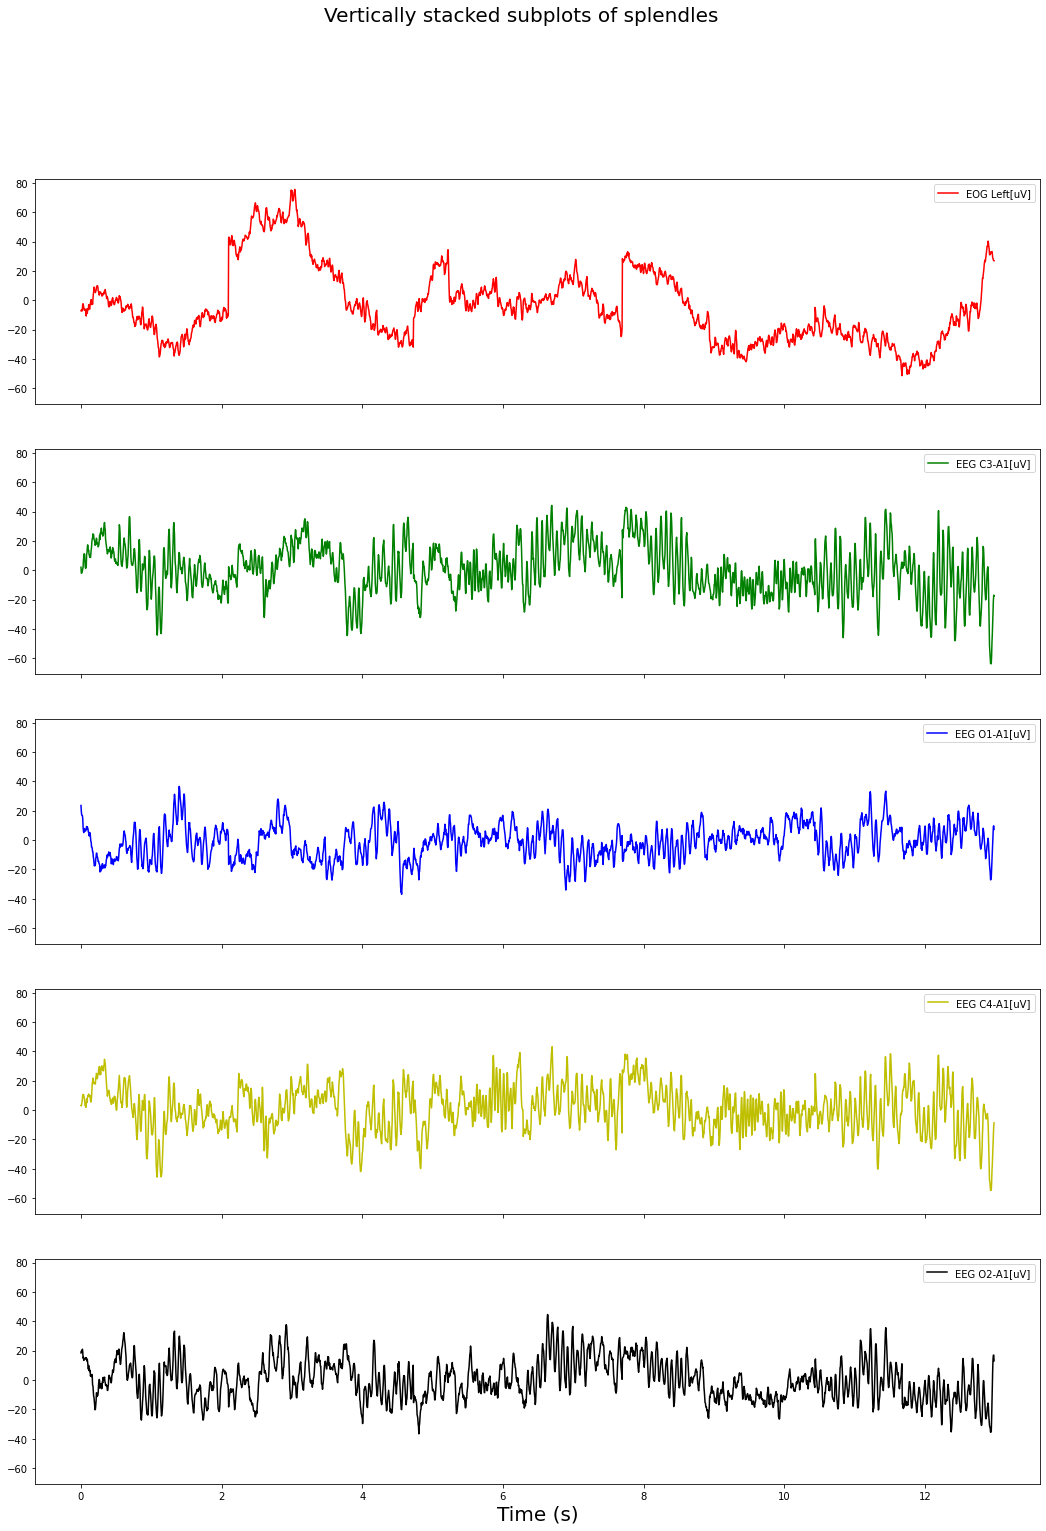

In [16]:
# plot these features in the same graph with stack plot
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["EOG Left[uV]", "EEG C3-A1[uV]", "EEG O1-A1[uV]", 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']
colors = ["r","g","b",'y',"k"]
fig.suptitle('Vertically stacked subplots of splendles', fontsize = 20)
# ---- loop over axes ----
for i,ax in enumerate(axs):
  axs[i].plot(df2_new['Time (s)'], df2_new[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")
plt.xlabel('Time (s)', fontsize = 20)
plt.show()



# FFT Fourier Fast Transform 

we can get the FFT from scipy module https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html <br>
https://fr.mathworks.com/help/signal/ug/power-spectral-density-estimates-using-fft.html

In [17]:
from scipy import fft
df3 = df2_new.copy()
labels = ["EOG Left[uV]", "EEG C3-A1[uV]", "EEG O1-A1[uV]", 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']
df3 = df3[labels].apply(fft)
df3['Time (s)'] = df2_new['Time (s)']
df3

,EOG Left[uV],EEG C3-A1[uV],EEG O1-A1[uV],EEG C4-A1[uV],EEG O2-A1[uV],Time (s)
0,-9545.019531-0.000000j,1982.226562-0.000000j,-2434.863281+0.000000j,3068.457031+0.000000j,-175.683594-0.000000j,0.000
1,-10728.857945-22378.633105j,-6139.391879-1588.409372j,1877.049474+2803.573637j,-4430.651333+873.854596j,-5730.388398-1214.341343j,0.005
2,-3949.263207-13448.028878j,5037.863720-5854.287045j,-408.144692+3172.471824j,4306.933261-2389.363582j,2477.522911-5425.448377j,0.010
3,-3874.691530+14792.527651j,-1920.953464+7022.590421j,-1885.006239-2488.867328j,-1642.682767+4339.393212j,-3062.633660+6873.030104j,0.015
4,10076.177322+6872.100878j,167.609746-4820.759057j,348.212047+3705.124487j,930.658289-571.666589j,480.177608-5989.248193j,0.020
...,...,...,...,...,...,...
2593,22388.432943+11142.518779j,3872.497300+5169.831020j,-1544.202704-1067.610342j,3447.222156+4348.959432j,1545.178230+5376.715765j,12.965
2594,10076.177322-6872.100878j,167.609746+4820.759057j,348.212047-3705.124487j,930.658289+571.666589j,480.177608+5989.248193j,12.970
2595,-3874.691530-14792.527651j,-1920.953464-7022.590421j,-1885.006239+2488.867328j,-1642.682767-4339.393212j,-3062.633660-6873.030104j,12.975
2596,-3949.263207+13448.028878j,5037.863720+5854.287045j,-408.144692-3172.471824j,4306.933261+2389.363582j,2477.522911+5425.448377j,12.980


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part



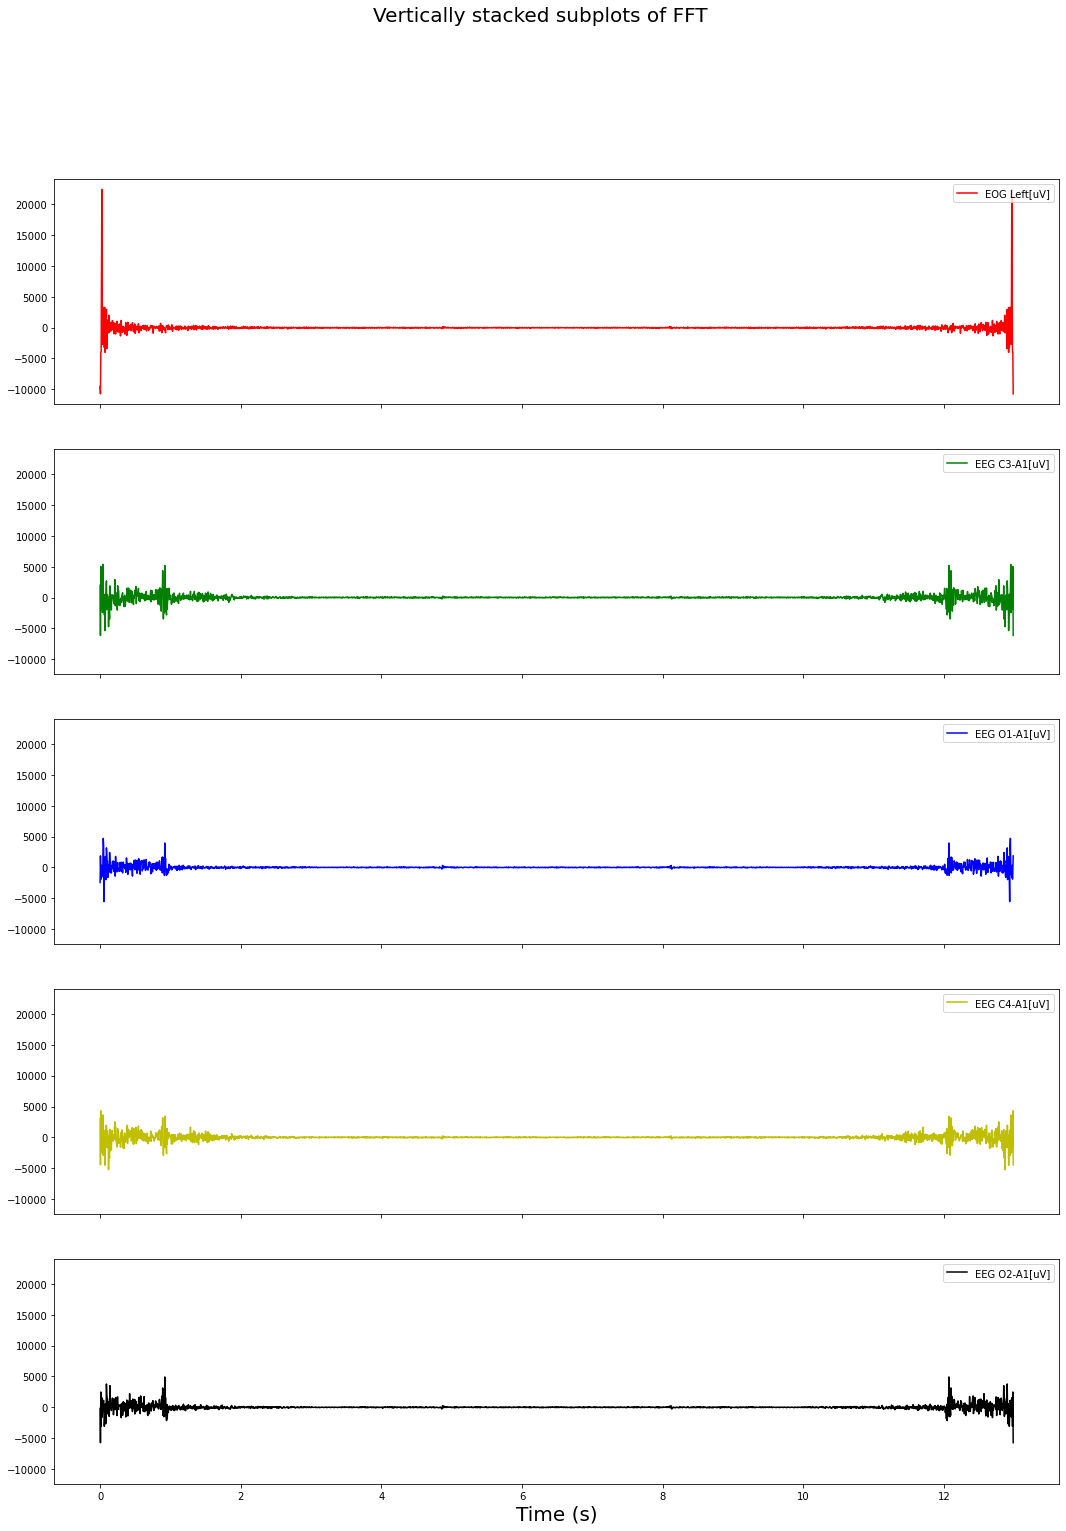

In [18]:
# plot these FFT features in the same graph with stack plot
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["EOG Left[uV]", "EEG C3-A1[uV]", "EEG O1-A1[uV]", 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']
colors = ["r","g","b",'y',"k"]
fig.suptitle('Vertically stacked subplots of FFT', fontsize=20)
# ---- loop over axes ----
for i,ax in enumerate(axs):
  axs[i].plot(df3['Time (s)'], df3[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")

plt.xlabel('Time (s)', fontsize = 20)
plt.show()

# In order to obtain the periodogram figure, the time (s) need to be converted to frequency (Hz). The recording frequency here is 0.005 s = 1/0.005 = 200 Hz

In [19]:
# add the feature of "frequency"
df3['frequency (Hz)'] = df3['Time (s)'].apply(lambda x: 1/x if x != 0 else 0 )
df3

,EOG Left[uV],EEG C3-A1[uV],EEG O1-A1[uV],EEG C4-A1[uV],EEG O2-A1[uV],Time (s),frequency (Hz)
0,-9545.019531-0.000000j,1982.226562-0.000000j,-2434.863281+0.000000j,3068.457031+0.000000j,-175.683594-0.000000j,0.000,0.000000
1,-10728.857945-22378.633105j,-6139.391879-1588.409372j,1877.049474+2803.573637j,-4430.651333+873.854596j,-5730.388398-1214.341343j,0.005,200.000000
2,-3949.263207-13448.028878j,5037.863720-5854.287045j,-408.144692+3172.471824j,4306.933261-2389.363582j,2477.522911-5425.448377j,0.010,100.000000
3,-3874.691530+14792.527651j,-1920.953464+7022.590421j,-1885.006239-2488.867328j,-1642.682767+4339.393212j,-3062.633660+6873.030104j,0.015,66.666667
4,10076.177322+6872.100878j,167.609746-4820.759057j,348.212047+3705.124487j,930.658289-571.666589j,480.177608-5989.248193j,0.020,50.000000
...,...,...,...,...,...,...,...
2593,22388.432943+11142.518779j,3872.497300+5169.831020j,-1544.202704-1067.610342j,3447.222156+4348.959432j,1545.178230+5376.715765j,12.965,0.077131
2594,10076.177322-6872.100878j,167.609746+4820.759057j,348.212047-3705.124487j,930.658289+571.666589j,480.177608+5989.248193j,12.970,0.077101
2595,-3874.691530-14792.527651j,-1920.953464-7022.590421j,-1885.006239+2488.867328j,-1642.682767-4339.393212j,-3062.633660-6873.030104j,12.975,0.077071
2596,-3949.263207+13448.028878j,5037.863720+5854.287045j,-408.144692-3172.471824j,4306.933261+2389.363582j,2477.522911+5425.448377j,12.980,0.077042


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part



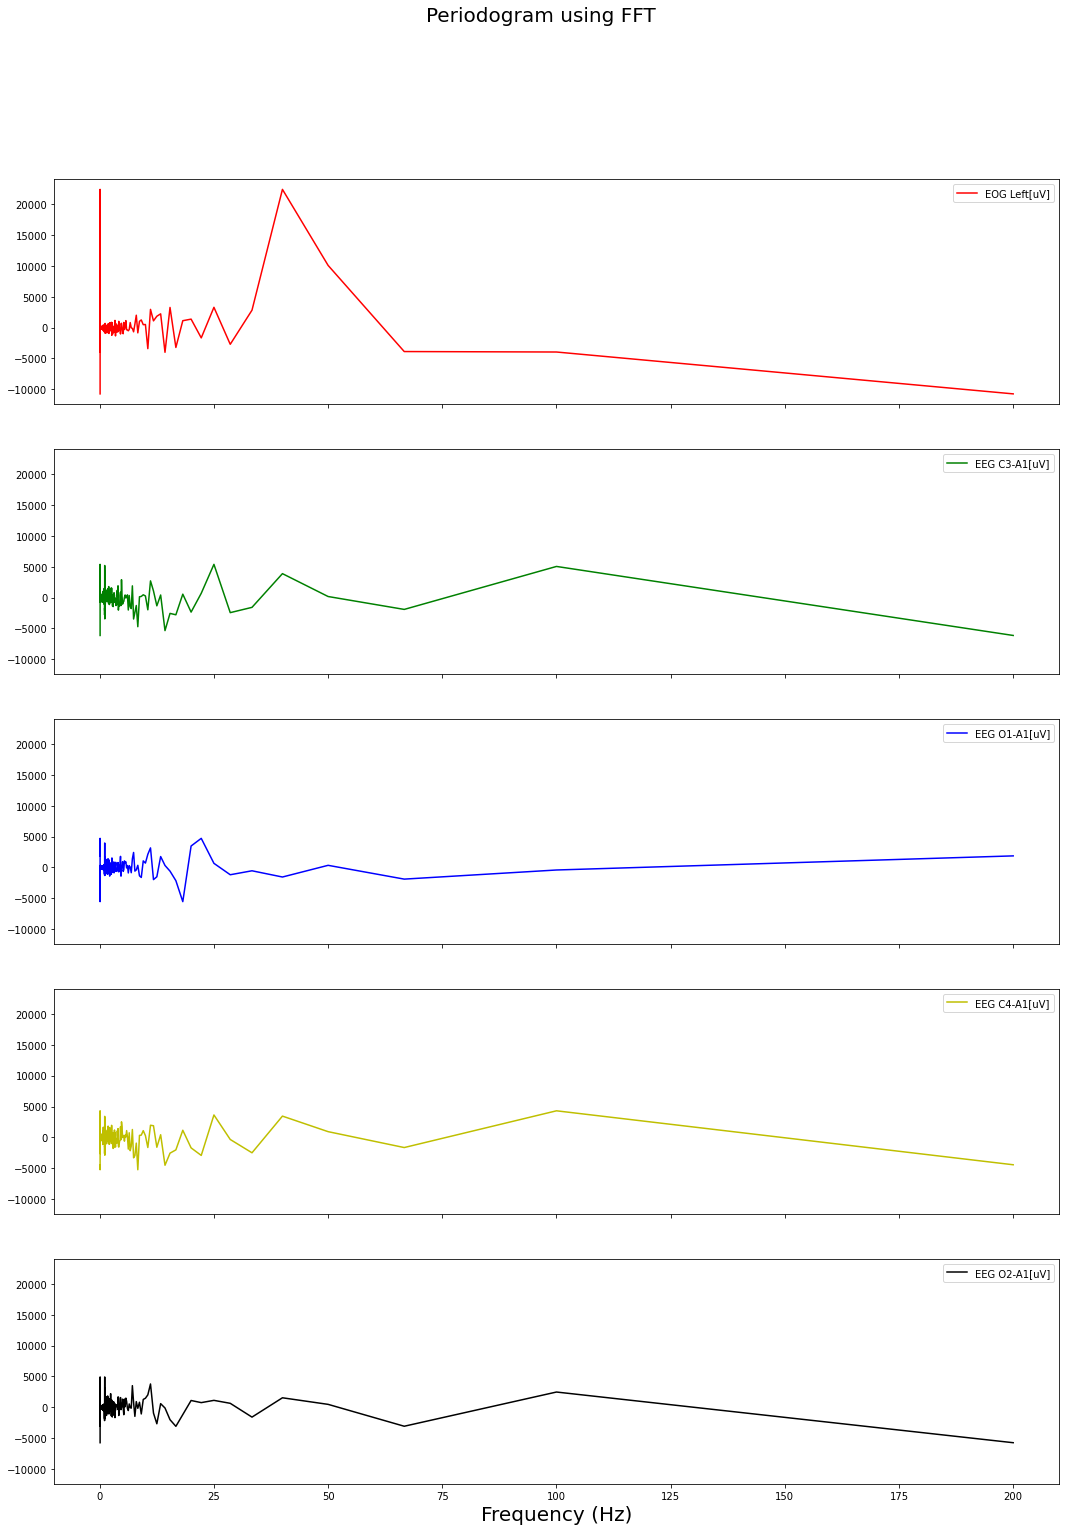

In [20]:
# plot these FFT features in the same graph with stack plot
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["EOG Left[uV]", "EEG C3-A1[uV]", "EEG O1-A1[uV]", 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']
colors = ["r","g","b",'y',"k"]
fig.suptitle('Periodogram using FFT', fontsize=20)
# ---- loop over axes ----
for i,ax in enumerate(axs):
  axs[i].plot(df3['frequency (Hz)'][1:], df3[labels[i]][1:],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")

plt.xlabel('Frequency (Hz)', fontsize = 20)
plt.show()